In [62]:
import open3d as o3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio

TriangleMesh with 4731 points and 8754 triangles.
[[-1500.          1000.          1499.99987793]
 [-1312.5         1000.          1499.99987793]
 [-1500.           937.5         1499.99987793]
 ...
 [  -49.5102005    563.93121338   -54.59370041]
 [  -49.68389893   567.44897461   -54.80879974]
 [  -45.92039871   566.14611816   -55.94490051]]
[[   0    1    2]
 [   3    4    5]
 [   3    6    4]
 ...
 [4730 4709 4729]
 [4730 4727 4711]
 [4730 4729 4727]]
[[890.1249 890.1249 890.1249 ... 890.1249 890.1249 890.1249]
 [892.6079 892.6079 892.6079 ... 892.6079 892.6079 892.6079]
 [895.1046 895.1046 895.1046 ... 895.1046 895.1046 895.1046]
 ...
 [895.1048 895.1048 895.1048 ... 895.1048 895.1048 895.1048]
 [892.6081 892.6081 892.6081 ... 892.6081 892.6081 892.6081]
 [890.125  890.125  890.125  ... 890.125  890.125  890.125 ]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[3025 3025 3025 ... 2762 2762 2762]
 [3025 3025 3

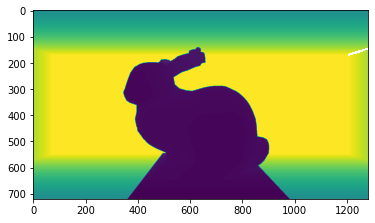

In [63]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
print(mesh)
print(np.asarray(mesh.vertices))
print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 500, 0],
    eye=[0, 500, 200],
    up=[0, -1, 0],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
plt.imshow(ans['t_hit'].numpy())
# imageio.imwrite('test.jpeg', ans['t_hit'].numpy())
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test.csv', index=False)

ans_unique = np.unique(ans['primitive_ids'].numpy())
print(ans_unique.shape[0])



[[890.1249  890.1249  890.1249  ... 890.1251  890.1251  890.1251 ]
 [892.6079  892.6079  892.6079  ... 892.6081  892.6081  892.6081 ]
 [895.1046  895.1046  895.1046  ... 895.1048  895.1048  895.1048 ]
 ...
 [895.1048  895.1048  895.1048  ... 895.1047  895.1047  895.1047 ]
 [892.6081  892.6081  892.6081  ... 892.60803 892.60803 892.60803]
 [890.125   890.125   890.125   ... 890.1249  890.1249  890.1249 ]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[2760 2760 2760 ... 2932 2932 2932]
 [2760 2760 2760 ... 2932 2932 2932]
 [2760 2760 2760 ... 2932 2932 2932]
 ...
 [2502 2502 2502 ... 2366 2366 2366]
 [2502 2502 2502 ... 2366 2366 2366]
 [2502 2502 2502 ... 2366 2366 2366]]
2294


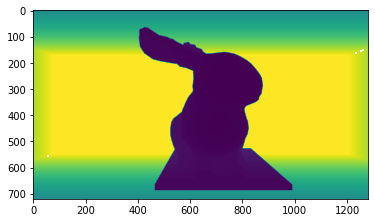

In [64]:
mesh = o3d.io.read_triangle_mesh('bunny_mesh_merge.OBJ')
# print(mesh)
# print(np.asarray(mesh.vertices))
# print(np.asarray(mesh.triangles))
# print(type(mesh))
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(mesh)

# rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
#     fov_deg=90,
#     center=[0, 500, 0],
#     eye=[0, 500, 200],
#     up=[-1, 0, 0],
#     width_px=1280,
#     height_px=720,
# )

rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    eye=[-200, 500, 0],
    center=[0, 500, 0],
    up=[0, -1, 0],
    width_px=1280,
    height_px=720,
)

ans = scene.cast_rays(rays)
plt.imshow(ans['t_hit'].numpy())
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy(), ans['primitive_ids'].numpy())
df = pd.DataFrame(ans['primitive_ids'].numpy())
df.to_csv('./test_1.csv', index=False)

ans_unique = np.unique(ans['primitive_ids'].numpy())
print(ans_unique.shape[0])

In [65]:
base_num_arr = np.zeros(8754+1)
base_view = pd.read_csv('./test.csv').to_numpy()
base_unique, base_counts = np.unique(base_view, return_counts=True)

for idx in range(base_unique.shape[0]):
    if base_unique[idx] == 4294967295:
        base_num_arr[0] = base_counts[idx]
    else:
        base_num_arr[base_unique[idx]] = base_counts[idx]

print(base_num_arr)
print(np.count_nonzero(base_num_arr))


src_num_arr = np.zeros(8754+1)
src_view = pd.read_csv('./test_1.csv').to_numpy()
unique, counts = np.unique(src_view, return_counts=True)

for idx in range(unique.shape[0]):
    if unique[idx] == 4294967295:
        src_num_arr[0] = counts[idx]
    else:
        src_num_arr[unique[idx]] = counts[idx]
print(src_num_arr)
print(np.count_nonzero(src_num_arr))

merge_min = np.minimum(base_num_arr, src_num_arr)
print(merge_min)
print(np.count_nonzero(merge_min))
print(np.sum(merge_min))
coverage = np.sum(merge_min) / (1280*720)
print(coverage)


[23.  0.  0. ... 10.  0.  0.]
1898
[  4. 805. 805. ...   0.   0.   0.]
2294
[4. 0. 0. ... 0. 0. 0.]
518
148928.0
0.16159722222222223
